In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [7]:
df = pd.read_csv("cement_data_1.csv")
df.head()

,Material ID,material type,company name,location,type of cement,distance,geolocation,market cost,quantity,petrol price,quality,excise duty cost,season of purchase,cost
0,6748,cement,ULTRATECH,Bhilai,Low Heat Cement,30,"[21.20919, 81.4285]",118,30,102,43,424.8,Winter,5969.6
1,5953,cement,ULTRATECH,Delhi,Low Heat Cement,200,"[28.7040592, 77.1024902]",146,10,95,43,175.2,Winter,11530.4
2,9520,cement,ORIENT,Jaipur,Air Entraining Cement,170,"[27.0, 76.0]",119,30,105,43,428.4,Summer,13541.8
3,2277,cement,AMBUJA,Guwahati,White Cement,210,"[26.148043, 91.731377]",134,40,97,53,643.2,Rainy,17061.4
4,1649,cement,AMBUJA,Bhopal,Blast Furnace Slag Cement,100,"[23.25469, 77.40289]",143,20,96,53,343.2,Summer,8466.4


In [8]:
df.shape

(5000, 14)

In [9]:
df.groupby('location')['location'].agg('count')

location
Bhilai           728
Bhopal           717
Delhi            741
Guwahati         689
Jaipur           720
Jamshedpur       704
Vishakapatnam    701
Name: location, dtype: int64

In [10]:
df1 = df.drop(['Material ID' , 'material type' , 'location' , 'geolocation' , 'company name'] , axis = 'columns')
df1.head()

,type of cement,distance,market cost,quantity,petrol price,quality,excise duty cost,season of purchase,cost
0,Low Heat Cement,30,118,30,102,43,424.8,Winter,5969.6
1,Low Heat Cement,200,146,10,95,43,175.2,Winter,11530.4
2,Air Entraining Cement,170,119,30,105,43,428.4,Summer,13541.8
3,White Cement,210,134,40,97,53,643.2,Rainy,17061.4
4,Blast Furnace Slag Cement,100,143,20,96,53,343.2,Summer,8466.4


In [11]:
df2 = df1.dropna()
df2.isnull().sum()

type of cement        0
distance              0
market cost           0
quantity              0
petrol price          0
quality               0
excise duty cost      0
season of purchase    0
cost                  0
dtype: int64

In [12]:
df2.groupby('type of cement')['type of cement'].agg('count')

type of cement
Air Entraining Cement        616
Blast Furnace Slag Cement    536
Colored Cement               548
Expansive Cement             552
High Alumina Cement          570
Hydrophobic Cement           563
Low Heat Cement              571
Sulfates Resisting Cement    531
White Cement                 513
Name: type of cement, dtype: int64

In [57]:
df2.head()

,type of cement,distance,market cost,quantity,petrol price,quality,excise duty cost,season of purchase,cost
0,Low Heat Cement,30,118,30,102,43,424.8,Winter,5969.6
1,Low Heat Cement,200,146,10,95,43,175.2,Winter,11530.4
2,Air Entraining Cement,170,119,30,105,43,428.4,Summer,13541.8
3,White Cement,210,134,40,97,53,643.2,Rainy,17061.4
4,Blast Furnace Slag Cement,100,143,20,96,53,343.2,Summer,8466.4


In [13]:
df3 = df2.copy()
df3['cost per km'] = df3['cost']/df2['distance']
df3

,type of cement,distance,market cost,quantity,petrol price,quality,excise duty cost,season of purchase,cost,cost per km
0,Low Heat Cement,30,118,30,102,43,424.8,Winter,5969.6,198.986667
1,Low Heat Cement,200,146,10,95,43,175.2,Winter,11530.4,57.652000
2,Air Entraining Cement,170,119,30,105,43,428.4,Summer,13541.8,79.657647
3,White Cement,210,134,40,97,53,643.2,Rainy,17061.4,81.244762
4,Blast Furnace Slag Cement,100,143,20,96,53,343.2,Summer,8466.4,84.664000
...,...,...,...,...,...,...,...,...,...,...
4995,Blast Furnace Slag Cement,30,103,20,102,33,247.2,Winter,4134.4,137.813333
4996,Low Heat Cement,200,106,40,95,53,508.8,Rainy,14977.6,74.888000
4997,Air Entraining Cement,30,142,40,102,53,681.6,Summer,8623.2,287.440000
4998,Air Entraining Cement,95,126,40,110,33,604.8,Summer,11589.6,121.995789


In [59]:
df3.shape

(5000, 10)

In [15]:
df3 = pd.get_dummies(df3 , drop_first = True)

In [61]:
df3

,distance,market cost,quantity,petrol price,quality,excise duty cost,cost,cost per km,type of cement_Blast Furnace Slag Cement,type of cement_Colored Cement,type of cement_Expansive Cement,type of cement_High Alumina Cement,type of cement_Hydrophobic Cement,type of cement_Low Heat Cement,type of cement_Sulfates Resisting Cement,type of cement_White Cement,season of purchase_Summer,season of purchase_Winter
0,30,118,30,102,43,424.8,5969.6,198.986667,False,False,False,False,False,True,False,False,False,True
1,200,146,10,95,43,175.2,11530.4,57.652000,False,False,False,False,False,True,False,False,False,True
2,170,119,30,105,43,428.4,13541.8,79.657647,False,False,False,False,False,False,False,False,True,False
3,210,134,40,97,53,643.2,17061.4,81.244762,False,False,False,False,False,False,False,True,False,False
4,100,143,20,96,53,343.2,8466.4,84.664000,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,103,20,102,33,247.2,4134.4,137.813333,True,False,False,False,False,False,False,False,False,True
4996,200,106,40,95,53,508.8,14977.6,74.888000,False,False,False,False,False,True,False,False,False,False
4997,30,142,40,102,53,681.6,8623.2,287.440000,False,False,False,False,False,False,False,False,True,False
4998,95,126,40,110,33,604.8,11589.6,121.995789,False,False,False,False,False,False,False,False,True,False


In [16]:
df3 = df3*1
df3

,distance,market cost,quantity,petrol price,quality,excise duty cost,cost,cost per km,type of cement_Blast Furnace Slag Cement,type of cement_Colored Cement,type of cement_Expansive Cement,type of cement_High Alumina Cement,type of cement_Hydrophobic Cement,type of cement_Low Heat Cement,type of cement_Sulfates Resisting Cement,type of cement_White Cement,season of purchase_Summer,season of purchase_Winter
0,30,118,30,102,43,424.8,5969.6,198.986667,0,0,0,0,0,1,0,0,0,1
1,200,146,10,95,43,175.2,11530.4,57.652000,0,0,0,0,0,1,0,0,0,1
2,170,119,30,105,43,428.4,13541.8,79.657647,0,0,0,0,0,0,0,0,1,0
3,210,134,40,97,53,643.2,17061.4,81.244762,0,0,0,0,0,0,0,1,0,0
4,100,143,20,96,53,343.2,8466.4,84.664000,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,103,20,102,33,247.2,4134.4,137.813333,1,0,0,0,0,0,0,0,0,1
4996,200,106,40,95,53,508.8,14977.6,74.888000,0,0,0,0,0,1,0,0,0,0
4997,30,142,40,102,53,681.6,8623.2,287.440000,0,0,0,0,0,0,0,0,1,0
4998,95,126,40,110,33,604.8,11589.6,121.995789,0,0,0,0,0,0,0,0,1,0


In [63]:
df3.corr()

,distance,market cost,quantity,petrol price,quality,excise duty cost,cost,cost per km,type of cement_Blast Furnace Slag Cement,type of cement_Colored Cement,type of cement_Expansive Cement,type of cement_High Alumina Cement,type of cement_Hydrophobic Cement,type of cement_Low Heat Cement,type of cement_Sulfates Resisting Cement,type of cement_White Cement,season of purchase_Summer,season of purchase_Winter
distance,1.000000,0.002296,-0.015839,-0.291684,0.006854,-0.014614,0.860788,-0.677699,-0.006057,0.012391,0.000092,0.020066,-0.019026,0.004465,-0.020815,-0.006009,-0.013648,0.013676
market cost,0.002296,1.000000,0.001057,-0.018090,-0.016115,0.250780,0.126317,0.110487,-0.015015,0.016431,-0.019607,-0.001855,0.005691,-0.013771,0.031028,-0.016454,0.004781,-0.004891
quantity,-0.015839,0.001057,1.000000,-0.015278,-0.006806,0.961469,0.468294,0.455491,-0.002557,0.027188,-0.008522,0.013552,-0.014785,-0.009421,-0.002967,-0.003405,0.003171,0.032240
petrol price,-0.291684,-0.018090,-0.015278,1.000000,0.003017,-0.019209,-0.182373,0.193250,0.025820,-0.009553,-0.004954,-0.009363,-0.007105,0.002308,-0.017551,-0.010576,0.007520,-0.026522
quality,0.006854,-0.016115,-0.006806,0.003017,1.000000,-0.010905,0.001661,-0.018860,0.011320,-0.010448,0.026875,-0.016792,-0.011288,-0.000353,0.013043,0.001155,0.008543,-0.010171
excise duty cost,-0.014614,0.250780,0.961469,-0.019209,-0.010905,1.000000,0.488387,0.470621,-0.006089,0.028260,-0.010938,0.011357,-0.014433,-0.011302,0.005250,-0.008302,0.006590,0.027994
cost,0.860788,0.126317,0.468294,-0.182373,0.001661,0.488387,1.000000,-0.357923,-0.006524,0.023658,-0.005314,0.022988,-0.025357,-0.001759,-0.016991,-0.009605,-0.008350,0.023036
cost per km,-0.677699,0.110487,0.455491,0.193250,-0.018860,0.470621,-0.357923,1.000000,0.003096,0.015245,-0.015985,-0.002904,0.002479,-0.009994,0.007008,0.006409,0.001757,0.024472
type of cement_Blast Furnace Slag Cement,-0.006057,-0.015015,-0.002557,0.025820,0.011320,-0.006089,-0.006524,0.003096,1.000000,-0.121572,-0.122070,-0.124296,-0.123433,-0.124419,-0.119443,-0.117166,0.020106,-0.024449
type of cement_Colored Cement,0.012391,0.016431,0.027188,-0.009553,-0.010448,0.028260,0.023658,0.015245,-0.121572,1.000000,-0.123595,-0.125849,-0.124975,-0.125973,-0.120936,-0.118630,0.018703,0.005295


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

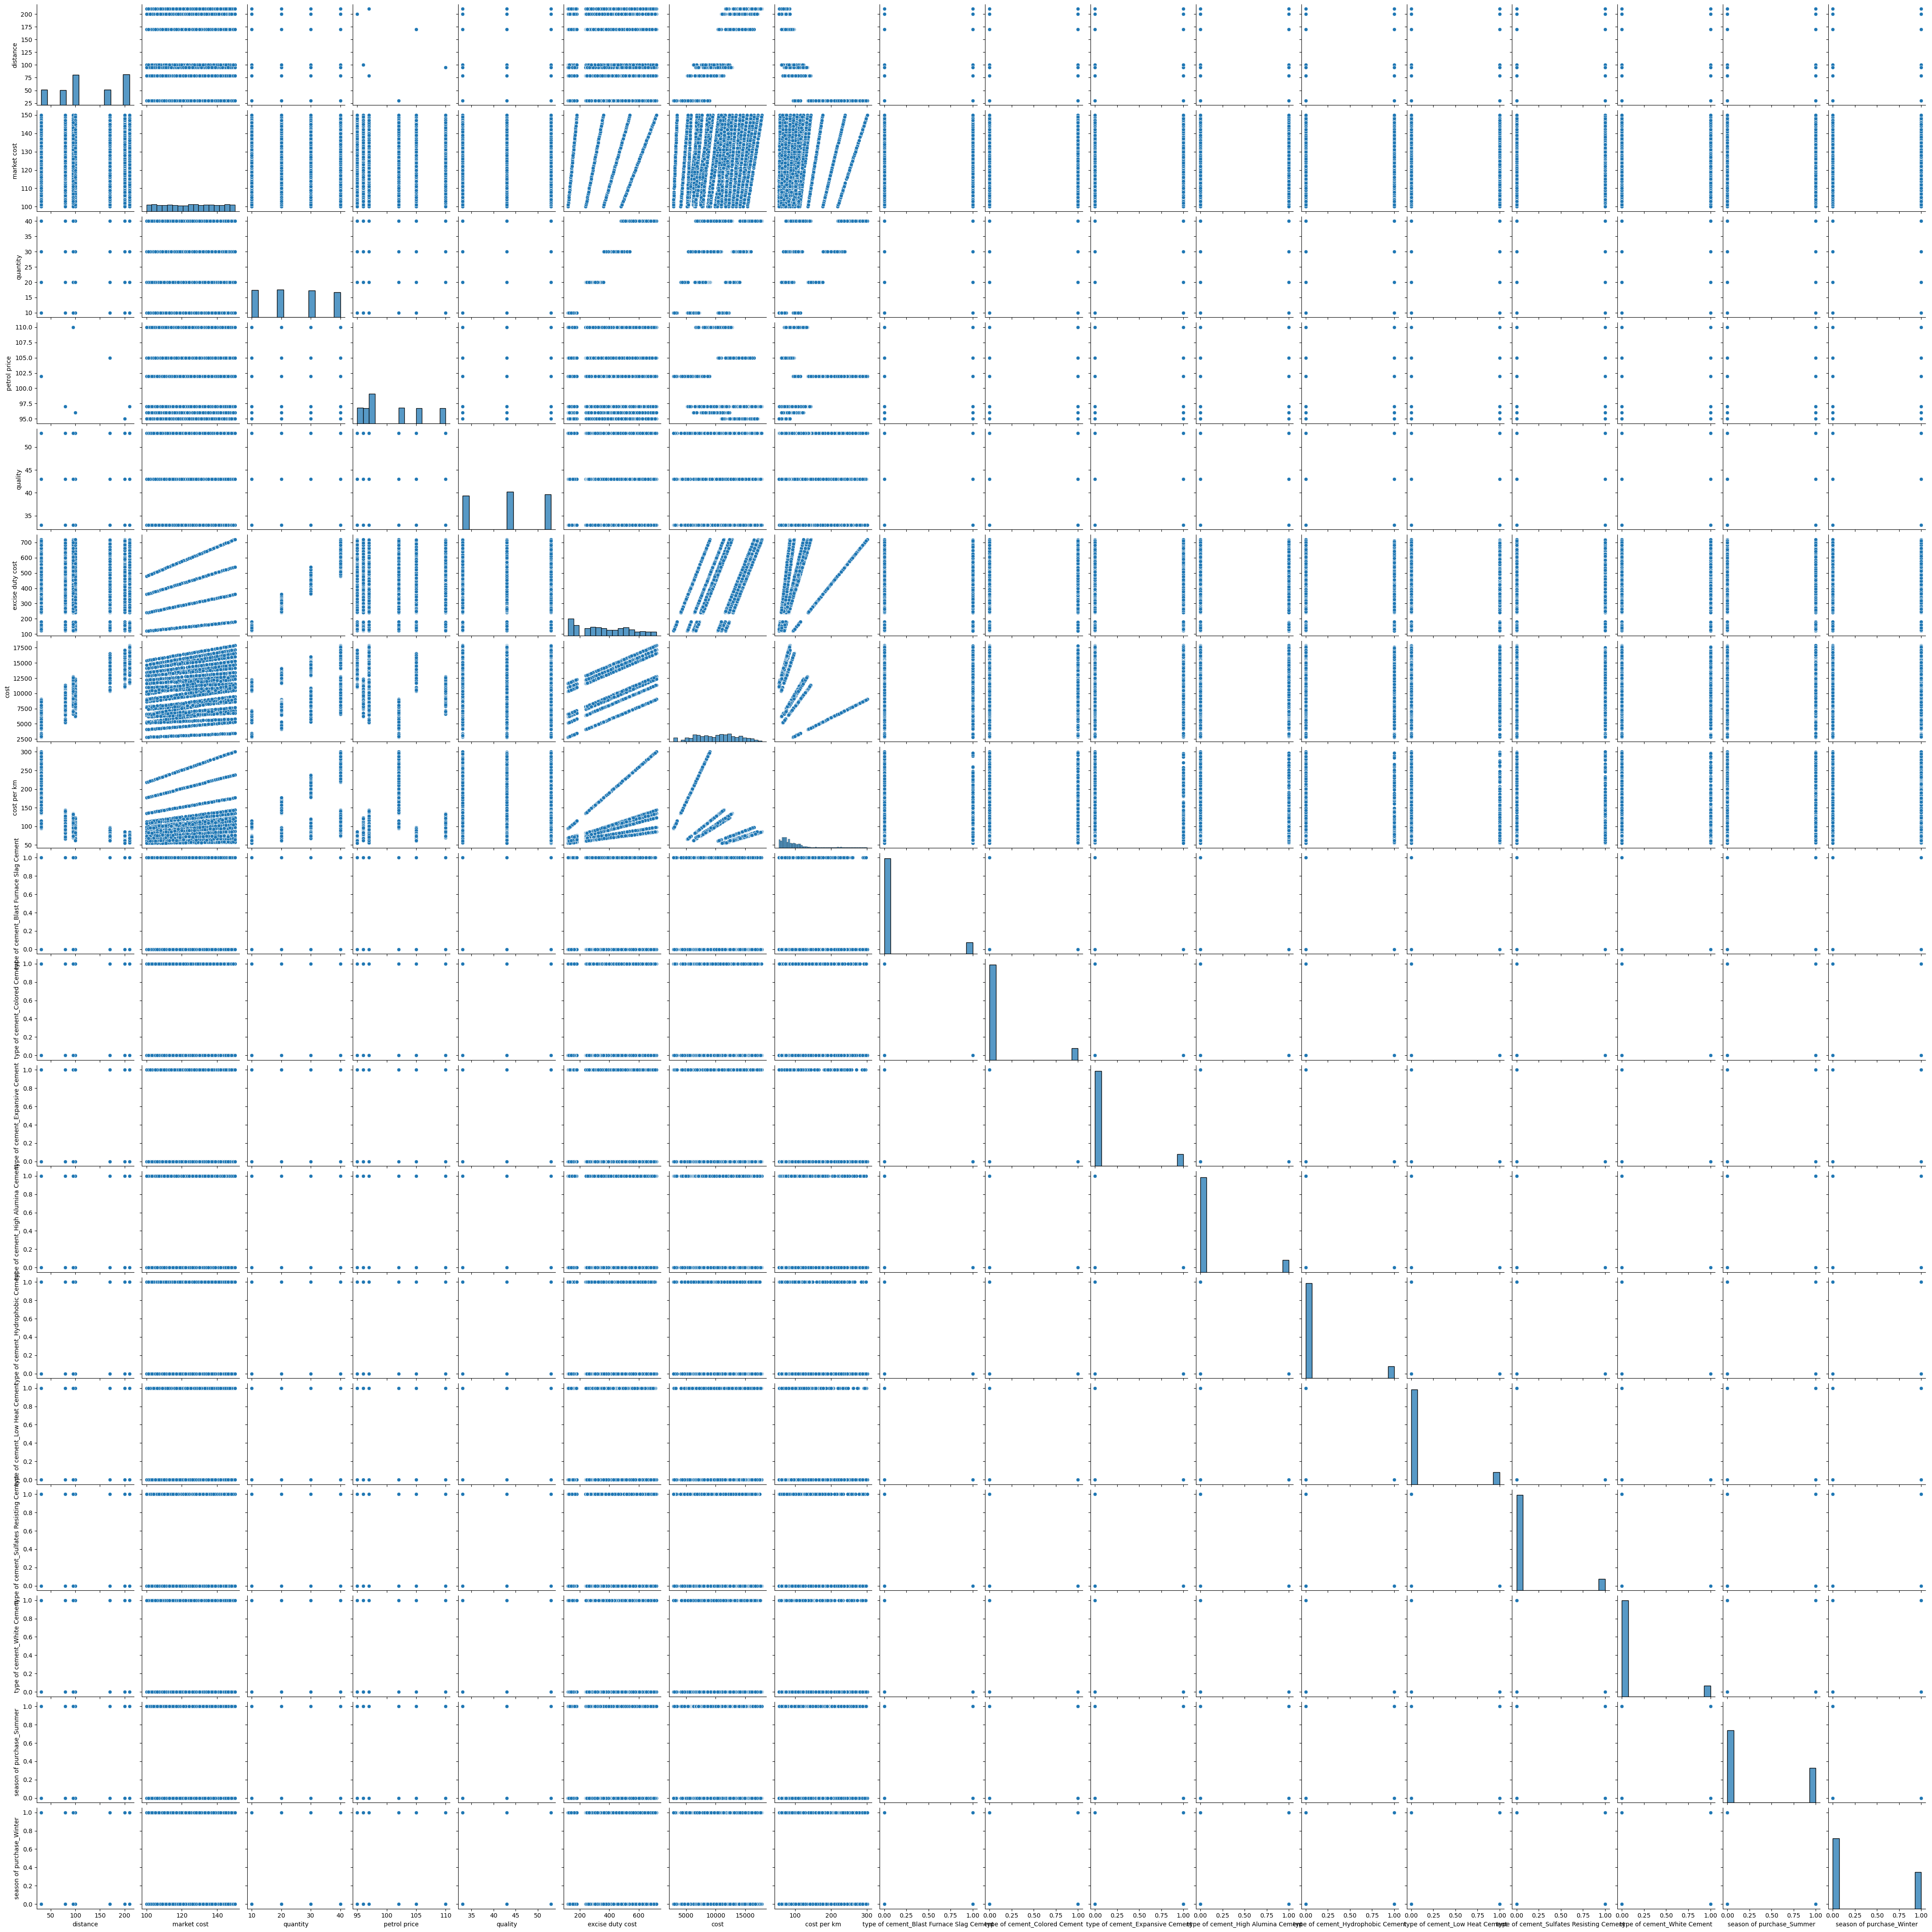

In [17]:
import seaborn as sns
sns.pairplot(df3)

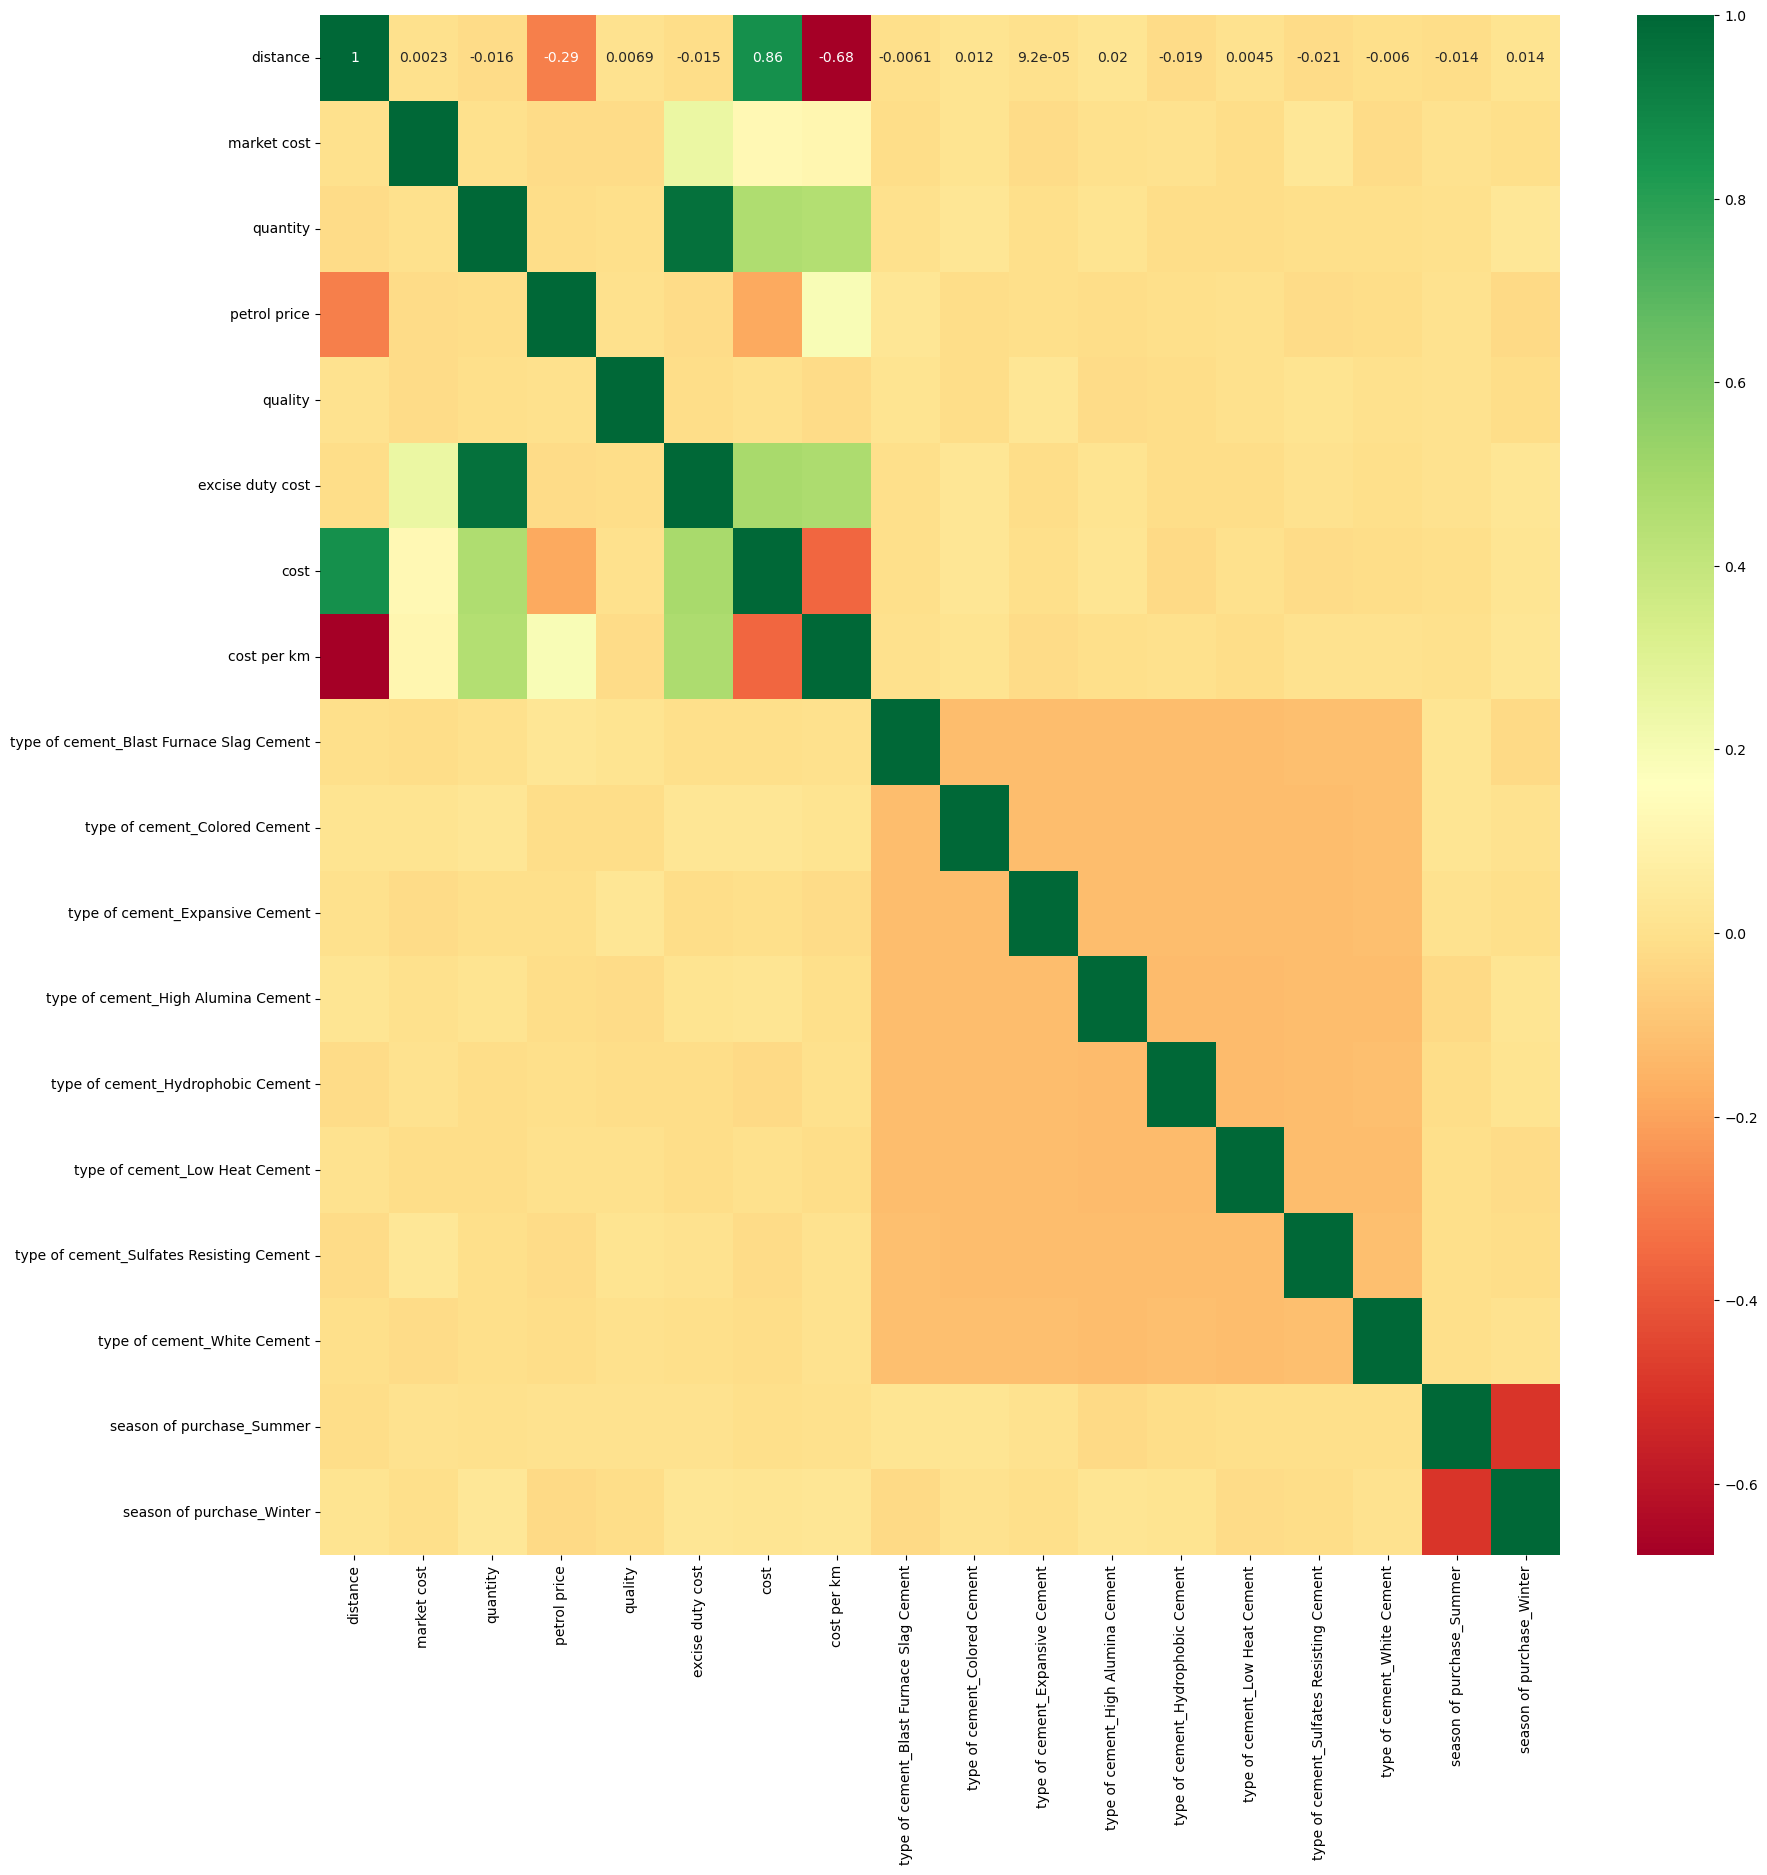

In [18]:
cormat = df3.corr()
top_f = cormat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(df3[top_f].corr(),annot=True,cmap="RdYlGn")

In [19]:
cost_v = df3["cost"]
cost_v

0        5969.6
1       11530.4
2       13541.8
3       17061.4
4        8466.4
         ...   
4995     4134.4
4996    14977.6
4997     8623.2
4998    11589.6
4999     4308.0
Name: cost, Length: 5000, dtype: float64

In [20]:
df3.drop("cost",axis=1,inplace=True)
df3

,distance,market cost,quantity,petrol price,quality,excise duty cost,cost per km,type of cement_Blast Furnace Slag Cement,type of cement_Colored Cement,type of cement_Expansive Cement,type of cement_High Alumina Cement,type of cement_Hydrophobic Cement,type of cement_Low Heat Cement,type of cement_Sulfates Resisting Cement,type of cement_White Cement,season of purchase_Summer,season of purchase_Winter
0,30,118,30,102,43,424.8,198.986667,0,0,0,0,0,1,0,0,0,1
1,200,146,10,95,43,175.2,57.652000,0,0,0,0,0,1,0,0,0,1
2,170,119,30,105,43,428.4,79.657647,0,0,0,0,0,0,0,0,1,0
3,210,134,40,97,53,643.2,81.244762,0,0,0,0,0,0,0,1,0,0
4,100,143,20,96,53,343.2,84.664000,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,103,20,102,33,247.2,137.813333,1,0,0,0,0,0,0,0,0,1
4996,200,106,40,95,53,508.8,74.888000,0,0,0,0,0,1,0,0,0,0
4997,30,142,40,102,53,681.6,287.440000,0,0,0,0,0,0,0,0,1,0
4998,95,126,40,110,33,604.8,121.995789,0,0,0,0,0,0,0,0,1,0


In [21]:
df3 = pd.concat([pd.Series(cost_v, index=df3.index, name='cost'), df3], axis=1)
df3

,cost,distance,market cost,quantity,petrol price,quality,excise duty cost,cost per km,type of cement_Blast Furnace Slag Cement,type of cement_Colored Cement,type of cement_Expansive Cement,type of cement_High Alumina Cement,type of cement_Hydrophobic Cement,type of cement_Low Heat Cement,type of cement_Sulfates Resisting Cement,type of cement_White Cement,season of purchase_Summer,season of purchase_Winter
0,5969.6,30,118,30,102,43,424.8,198.986667,0,0,0,0,0,1,0,0,0,1
1,11530.4,200,146,10,95,43,175.2,57.652000,0,0,0,0,0,1,0,0,0,1
2,13541.8,170,119,30,105,43,428.4,79.657647,0,0,0,0,0,0,0,0,1,0
3,17061.4,210,134,40,97,53,643.2,81.244762,0,0,0,0,0,0,0,1,0,0
4,8466.4,100,143,20,96,53,343.2,84.664000,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4134.4,30,103,20,102,33,247.2,137.813333,1,0,0,0,0,0,0,0,0,1
4996,14977.6,200,106,40,95,53,508.8,74.888000,0,0,0,0,0,1,0,0,0,0
4997,8623.2,30,142,40,102,53,681.6,287.440000,0,0,0,0,0,0,0,0,1,0
4998,11589.6,95,126,40,110,33,604.8,121.995789,0,0,0,0,0,0,0,0,1,0


In [22]:
X=df3.iloc[:,1:]
Y=df3.iloc[:,0]

In [23]:
X.head()

,distance,market cost,quantity,petrol price,quality,excise duty cost,cost per km,type of cement_Blast Furnace Slag Cement,type of cement_Colored Cement,type of cement_Expansive Cement,type of cement_High Alumina Cement,type of cement_Hydrophobic Cement,type of cement_Low Heat Cement,type of cement_Sulfates Resisting Cement,type of cement_White Cement,season of purchase_Summer,season of purchase_Winter
0,30,118,30,102,43,424.8,198.986667,0,0,0,0,0,1,0,0,0,1
1,200,146,10,95,43,175.2,57.652000,0,0,0,0,0,1,0,0,0,1
2,170,119,30,105,43,428.4,79.657647,0,0,0,0,0,0,0,0,1,0
3,210,134,40,97,53,643.2,81.244762,0,0,0,0,0,0,0,1,0,0
4,100,143,20,96,53,343.2,84.664000,1,0,0,0,0,0,0,0,1,0


In [24]:
Y.head()

0     5969.6
1    11530.4
2    13541.8
3    17061.4
4     8466.4
Name: cost, dtype: float64

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[7.26752427e-01 4.11806063e-03 1.22531211e-01 1.80946252e-02
 2.55951900e-07 9.69051753e-02 3.15967682e-02 1.17336140e-07
 2.35480640e-07 1.46157962e-07 1.20570027e-07 1.23320493e-07
 1.18361548e-07 1.29293194e-07 1.25907075e-07 1.90152087e-07
 1.70169281e-07]


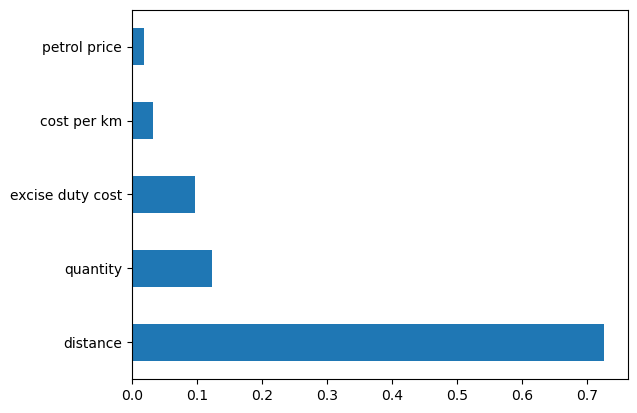

In [27]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [28]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [29]:
X_train.shape

(4000, 17)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [31]:
#Hyperparameters
n_estimator=[int(x) for x in np.linspace(start=100,stop=2000,num=20)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,60,num=12)]
min_samples_split=[2,5,10,15,20,30,60,100]
min_samples_leaf=[1,2,5,10,20]

In [32]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = { 'n_estimators':n_estimator,
                'max_features':max_features,
                'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], 'min_samples_split': [2, 5, 10, 15, 20, 30, 60, 100], 'min_samples_leaf': [1, 2, 5, 10, 20]}


In [33]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [34]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=1600; total time=   4.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=1600; total time=   4.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=1600; total time=   4.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=1600; total time=   4.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=1600; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=1100; total time=   6.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=1100; total time=   6.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=1100; total time=   6.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=1100; total time=   6.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=1100; total time=   6.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=500; total time=   2.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=500; total time=   2.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=500; total time=   2.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=500; total time=   2.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=500; total time=   2.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=500; total time=   3.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=500; total time=   3.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=500; total time=   3.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=500; total time=   3.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=500; total time=   3.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=55, max_fea

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.9s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30, 60, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
prediction = rf_random.predict(X_test)

In [36]:
prediction

array([10373.3161623 , 13283.981525  , 12162.86175534,  9093.90131429,
        5643.24541374, 15964.19033016, 12438.03562619,  6556.57820949,
        4209.61805556,  4704.82113413, 14369.64866667,  8040.77089603,
       10503.97219762, 11909.60271349, 10061.9072881 , 10578.40552262,
       16811.76258254,  5195.3651    ,  4479.7329881 , 11644.90173333,
       11467.59374167, 13487.10824206, 12281.9575619 ,  6487.97026385,
        6639.07684603,  6456.27858571, 12428.44272063, 11858.7800254 ,
        8766.85170238,  7103.55280397,  8614.52831587, 14775.88366429,
       15987.54726786,  9477.1307881 , 11506.02654524,  6507.87290913,
       14065.13766984, 11227.5896504 ,  3391.23221356, 10734.8549    ,
        6403.77647522, 10140.59817555,  5530.01014921,  9788.32364652,
        3004.46307659,  6629.80655267, 11714.39139048,  5330.27756746,
       13296.99257381, 10401.9107746 , 12428.4509873 ,  5489.92644524,
        8616.89289286, 15694.5363381 , 12002.09494444,  6309.11730714,
      

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


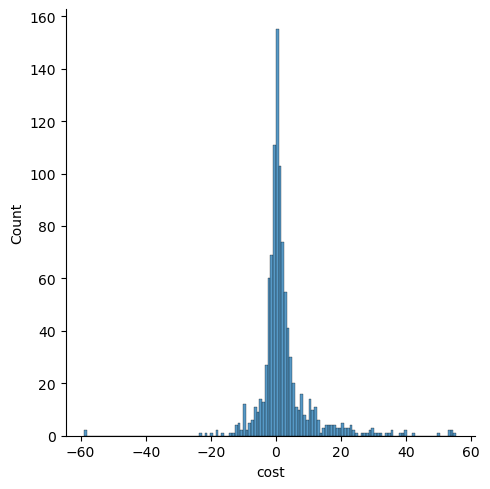

In [37]:
sns.displot(Y_test-prediction)

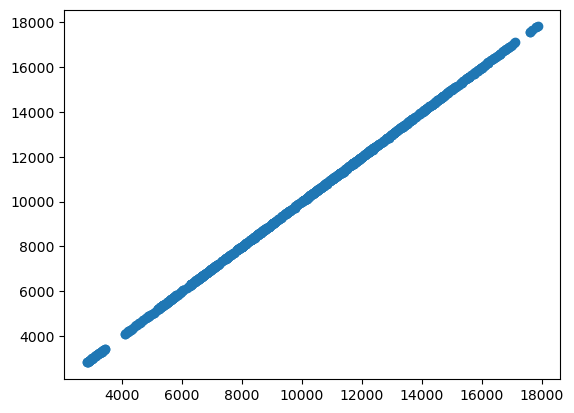

In [38]:
plt.scatter(Y_test,prediction)

In [39]:
import pickle
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)